# Classifier comparison to predict Olympic medals

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as mplt
import seaborn as sea

from lightgbm import LGBMClassifier




In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
print(df.head(6))
print(df.shape)

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                  

In [4]:
df = df[df['Year'] >= 1950]

In [5]:
print(df.shape)

(224864, 15)


Convert data into numerical format for easier classification

In [6]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['NOC'] = le.fit_transform(df['NOC'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Season'] = le.fit_transform(df['Season'])

df["Medal"].fillna("NA", inplace=True)
df["Medal"] = df["Medal"].astype("category")
df['Medal'].replace("NA", "None", inplace=True)
df['Medal'] = df['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0})

In [7]:
print(df.head(6))
print(df.shape)

   ID                      Name  Sex   Age  Height  Weight         Team  NOC  \
0   1                 A Dijiang    1  24.0   180.0    80.0        China   39   
1   2                  A Lamusi    1  23.0   170.0    60.0        China   39   
4   5  Christine Jacoba Aaftink    0  21.0   185.0    82.0  Netherlands  142   
5   5  Christine Jacoba Aaftink    0  21.0   185.0    82.0  Netherlands  142   
6   5  Christine Jacoba Aaftink    0  25.0   185.0    82.0  Netherlands  142   
7   5  Christine Jacoba Aaftink    0  25.0   185.0    82.0  Netherlands  142   

         Games  Year  Season         City  Sport  \
0  1992 Summer  1992       0    Barcelona      5   
1  2012 Summer  2012       0       London     25   
4  1988 Winter  1988       1      Calgary     39   
5  1988 Winter  1988       1      Calgary     39   
6  1992 Winter  1992       1  Albertville     39   
7  1992 Winter  1992       1  Albertville     39   

                                Event Medal  
0         Basketball Men's B

Oooh some NA values, let's fill them up with something substitutable!

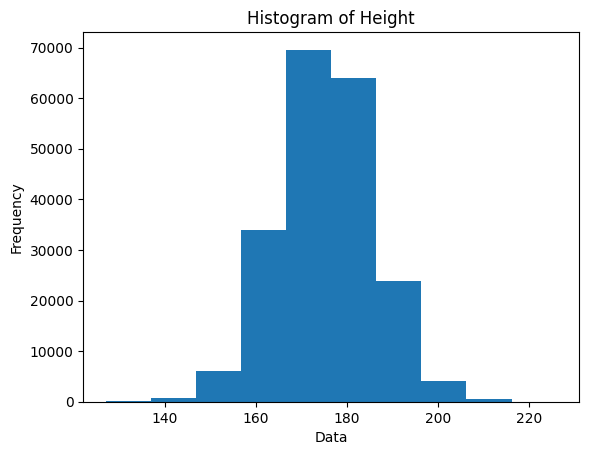

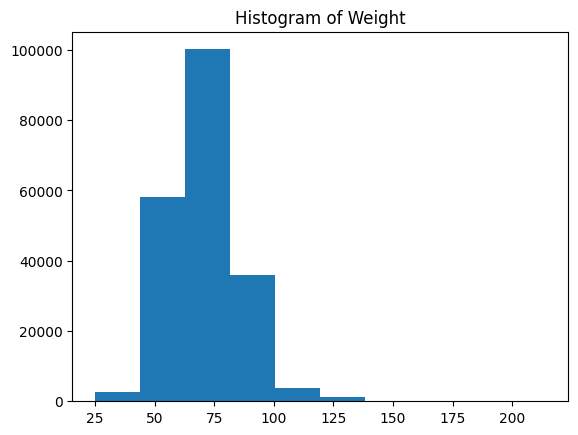

In [8]:
mplt.hist(df['Height'], bins=10)
mplt.xlabel('Data')
mplt.ylabel('Frequency')
mplt.title('Histogram of Height')
mplt.show()

mplt.hist(df['Weight'], bins=10)
mplt.title('Histogram of Weight')
mplt.show()

Ok looks fairly normal to me ;)
Let's focus on cutting our data and finalizing it

In [9]:
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df = df.drop(['ID','Name', 'Games', 'City', 'Team', 'Year', 'Event'], axis=1)
df.dropna(inplace=True)


In [10]:
print(df.head(6))
print(df.shape)

   Sex   Age  Height  Weight  NOC  Season  Sport Medal
0    1  24.0   180.0    80.0   39       0      5     0
1    1  23.0   170.0    60.0   39       0     25     0
4    0  21.0   185.0    82.0  142       1     39     0
5    0  21.0   185.0    82.0  142       1     39     0
6    0  25.0   185.0    82.0  142       1     39     0
7    0  25.0   185.0    82.0  142       1     39     0
(222834, 8)


Let's visualize the correlation to see if we need further adjustments

C:\Users\cheek\AppData\Local\Temp\ipykernel_11900\745788470.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.loc[:, :'Medal'].corr()


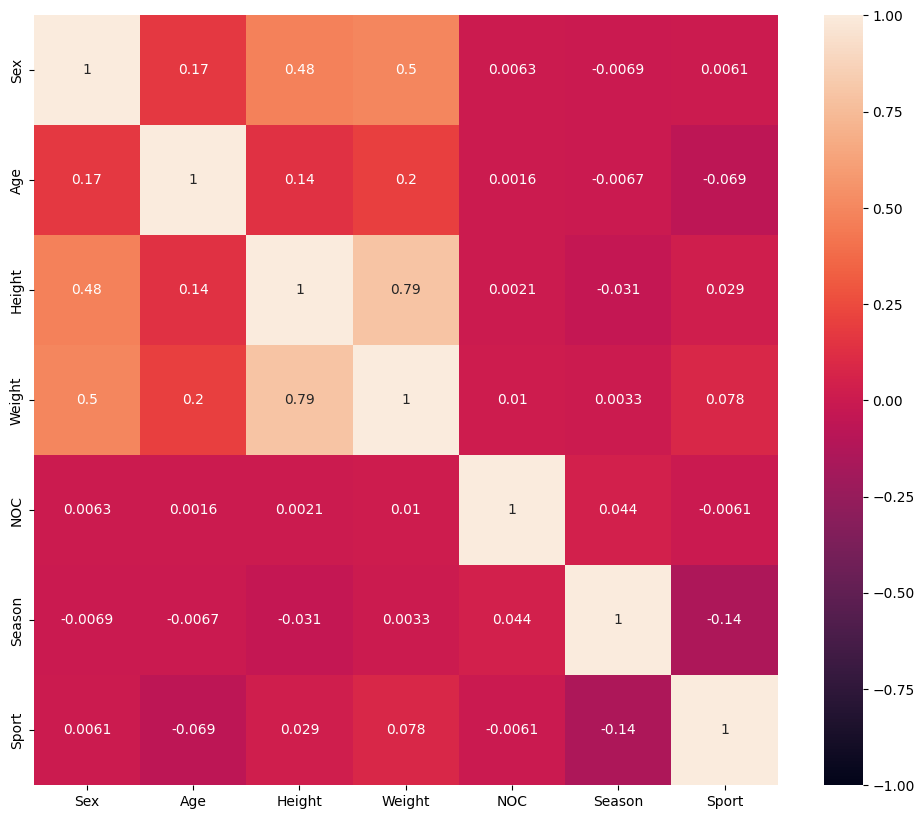

In [11]:
corr = df.loc[:, :'Medal'].corr()

mplt.figure(figsize=(12, 10))
sea.heatmap(corr, annot=True, vmin=-1.0)
mplt.show()

Splitting our data into test and train

In [12]:
#training and testing data
X = df.drop(['Medal'], axis=1)
y = df['Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now let us train and compare!

In [13]:
models = [DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(n_estimators=100), 
          KMeans(n_clusters=4, n_init=10), SVC(kernel='rbf'), LGBMClassifier(),
          MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=500, alpha=0.0001, solver='sgd', random_state=21)]
model_names = ['Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors', 'Random Forest', 'K-Means', 'SVM', 'LightGBM', 'Multi-Layer Perceptron']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_prediction)
    print(f"Accuracy of {model_names[i]}: {accuracy}")

Accuracy of Decision Tree: 0.818026791123477
Accuracy of Naive Bayes: 0.8639576368164785
Accuracy of K-Nearest Neighbors: 0.859784145219557
Accuracy of Random Forest: 0.8554535867345794
Accuracy of K-Means: 0.20142706486862477
Accuracy of SVM: 0.8668072789283551
Accuracy of LightGBM: 0.8723943725177822
Accuracy of Multi-Layer Perceptron: 0.8670540983238719
